In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\krist\OneDrive\Desktop\CareerFoundry\Data Immersion\Achievement 6\01-02-25 Airbnb Amsterdam'

In [4]:
df_listings=pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data',  'listings_cleaned.csv'))

In [5]:
df_listings.head()

,Unnamed: 0,listings_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_per_night,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [6]:
df_listings.shape

(20030, 16)

In [7]:
df_listings = df_listings.drop(columns = ['Unnamed: 0'])
df_listings = df_listings.drop(columns = ['listings_id'])
df_listings = df_listings.drop(columns = ['host_id'])
df_listings = df_listings.drop(columns = ['last_review'])

In [8]:
df_listings.columns

Index(['name', 'host_name', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price_per_night', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df_listings.dtypes

name                               object
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price_per_night                     int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
df_listings = df_listings.drop(columns = ['name'])
df_listings = df_listings.drop(columns = ['host_name'])
df_listings = df_listings.drop(columns = ['neighbourhood'])
df_listings = df_listings.drop(columns = ['room_type'])

In [11]:
df_listings.head()

,latitude,longitude,price_per_night,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,52.365755,4.941419,59,3,248,2.10,1,44
1,52.390225,4.873924,160,4,42,1.03,1,47
2,52.365087,4.893541,80,1,233,2.18,2,198
3,52.373114,4.883668,125,14,1,0.09,2,141
4,52.386727,4.892078,150,2,171,2.03,1,199


In [12]:
# Creating a correlation
df_listings.corr()

,latitude,longitude,price_per_night,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.137699,0.006163,-0.007749,0.038902,0.028684,0.006583,0.011300
longitude,-0.137699,1.000000,0.017813,0.001013,0.005360,0.003834,-0.012077,0.016150
price_per_night,0.006163,0.017813,1.000000,0.039119,-0.067417,-0.077052,0.017409,0.159293
minimum_nights,-0.007749,0.001013,0.039119,1.000000,-0.022019,-0.039202,-0.007225,0.059486
number_of_reviews,0.038902,0.005360,-0.067417,-0.022019,1.000000,0.655263,-0.042615,0.252856
reviews_per_month,0.028684,0.003834,-0.077052,-0.039202,0.655263,1.000000,-0.019968,0.229990
calculated_host_listings_count,0.006583,-0.012077,0.017409,-0.007225,-0.042615,-0.019968,1.000000,-0.001557
availability_365,0.011300,0.016150,0.159293,0.059486,0.252856,0.229990,-0.001557,1.000000


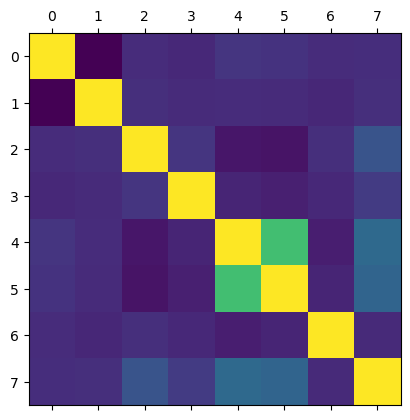

In [13]:
plt.matshow(df_listings.corr())
plt.show()


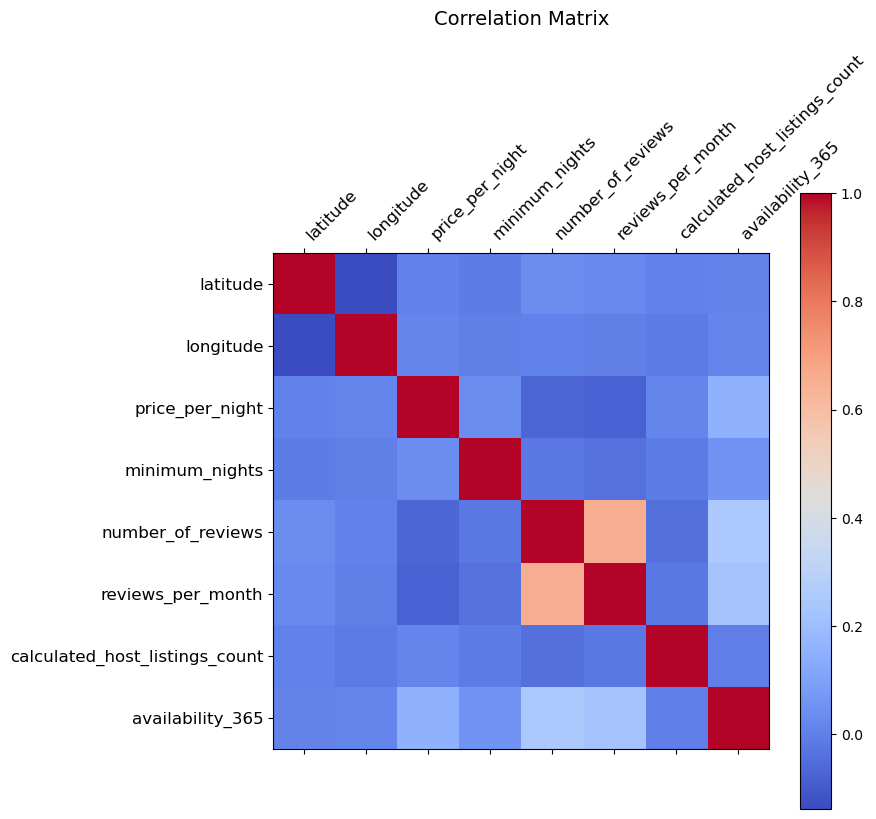

In [14]:
# Creating heatmap
fig, ax = plt.subplots(figsize=(8, 8))
corr_matrix = df_listings.corr()
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(df_listings.columns)))
ax.set_yticks(np.arange(len(df_listings.columns)))
ax.set_xticklabels(df_listings.columns, fontsize=12, rotation=45, ha="left")
ax.set_yticklabels(df_listings.columns, fontsize=12)
plt.title('Correlation Matrix', fontsize=14, pad=20)
plt.show()



The correlation matrix shows how strongly variables are related. 
For example, reviews_per_month and number_of_reviews have a positive correlation, meaning they increase together, while latitude and longitude have a negative correlation, reflecting geographical patterns. 
Most other variables show weak correlations, indicating they are largely independent of each other.


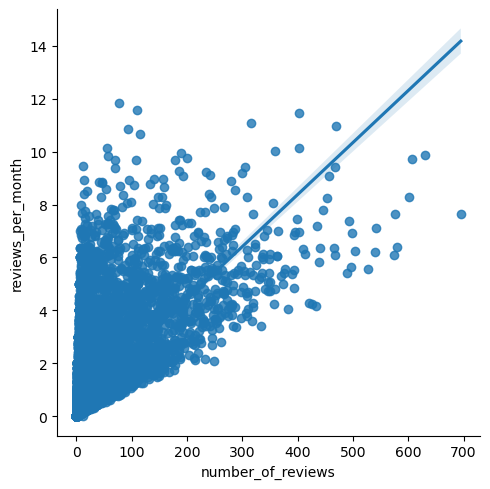

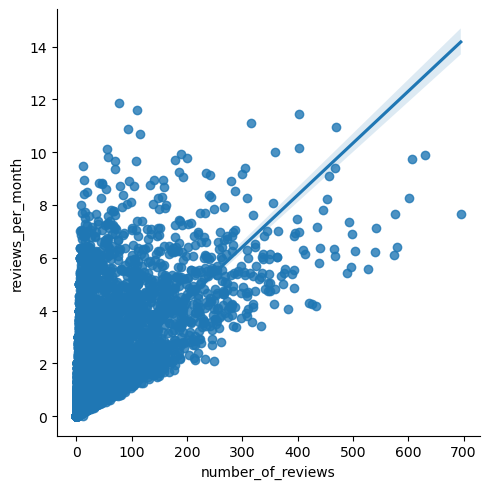

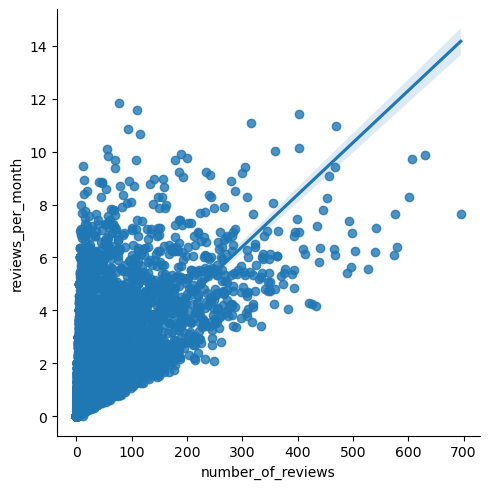

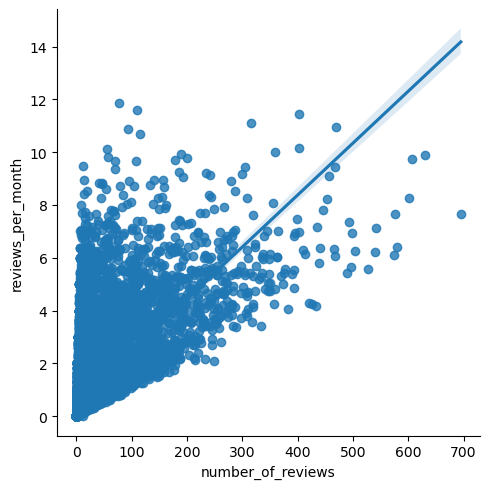

In [19]:
# Creating a scatterplot
sns.lmplot(x = 'number_of_reviews', y = 'reviews_per_month', data = df_listings)
plt.show()

The scatterplot shows the relationship between the number of reviews (number_of_reviews) and the reviews per month (reviews_per_month). As expected, there is a positive correlation: listings with a higher total number of reviews tend to have more frequent reviews per month. However, the spread at lower review counts suggests variability in monthly reviews, possibly due to differing listing activity or popularity.

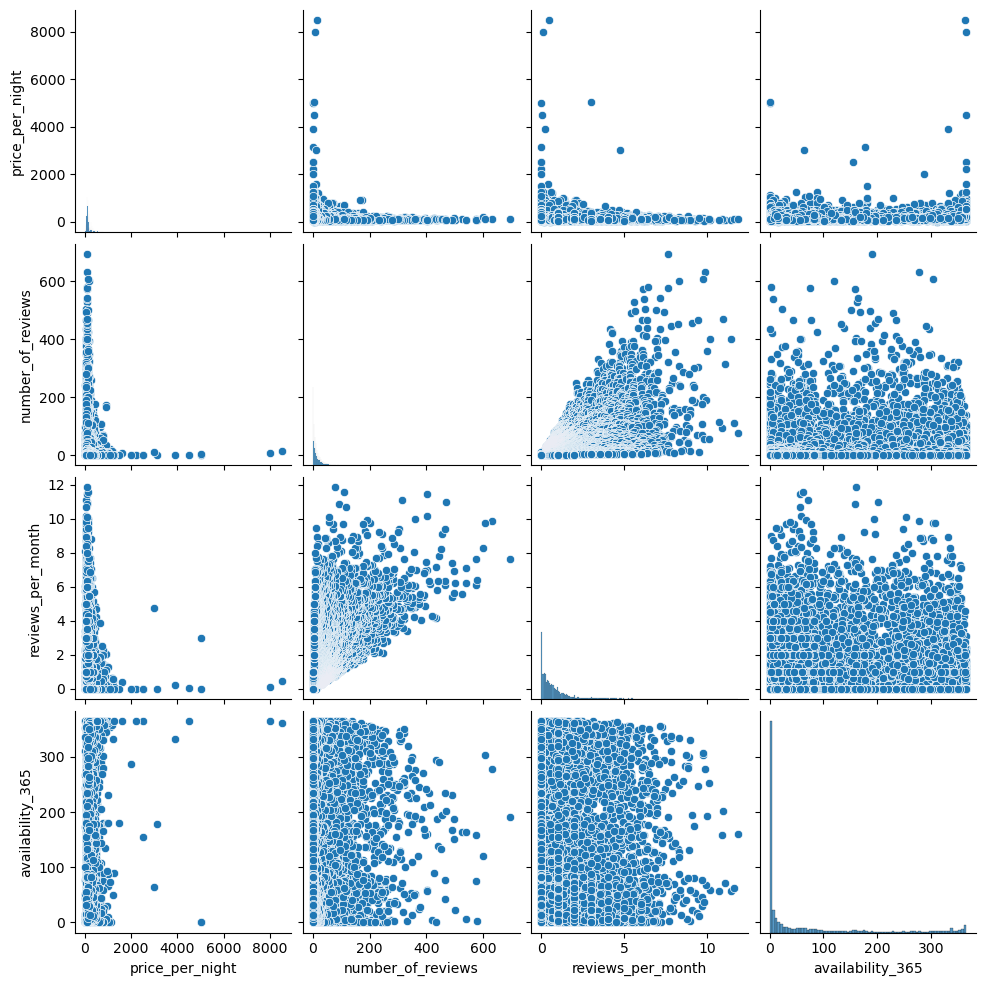

In [23]:
# Creating a pair plot

df_listings_2 = df_listings [['price_per_night', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

pair_plot= sns.pairplot(df_listings_2)
plt.show()

The distributions show that price_per_night, number_of_reviews, and reviews_per_month are highly skewed, with most values concentrated on the lower end and a few extreme outliers. Strong correlations exist between number_of_reviews and reviews_per_month, while availability_365 shows a slight positive relationship with both. Exploring price_per_night (due to outliers), and the relationship between availability_365 and review activity, could provide meaningful insights.

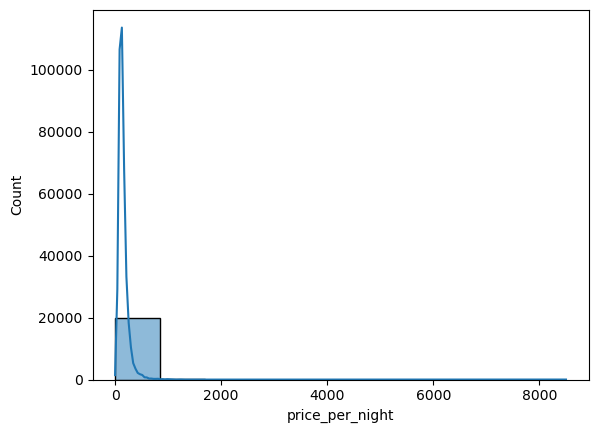

In [34]:
# Creating categorical plot

sns.histplot(df_listings['price_per_night'], bins = 10, kde = True)
plt.show()

The distribution of price_per_night is highly right-skewed, with most prices concentrated at the lower end and a long tail indicating a few high-priced outliers. This suggests that while most accommodations are affordable, there are some significantly expensive options that may need further investigation.

## Answers
How does proximity to tourist attractions affect Airbnb pricing?
While we didn’t directly analyze proximity to tourist attractions, the correlation between latitude/longitude and price_per_night in the heatmap showed very weak relationships. This suggests that pricing may not be directly tied to these geographic variables, but more exploration focusing on specific landmarks would be needed.

Are Airbnb prices influenced more by demand trends or seasonal factors?
From the scatterplot of number_of_reviews vs. reviews_per_month, we observed a positive relationship suggesting that higher demand correlates with increased reviews, which could indirectly indicate pricing trends. However, seasonal factors were not explored yet.

How do shared spaces affect guest satisfaction and pricing?
This wasn't directly analyzed, but the relationship between price_per_night and reviews could hint that shared spaces may have lower pricing and potentially different satisfaction patterns based on the quality of the reviews. A deeper dive into property types and reviews is needed.

How do business travelers' needs influence Airbnb availability and pricing?
Business travelers likely prefer listings with high availability. The scatterplot and correlation matrix showed that availability_365 has a modest positive correlation with price_per_night (0.159), hinting that properties marketed for business travelers (with higher availability) might be priced slightly higher.

## New Questions:

Do higher review counts correlate with increased availability and pricing trends?
This could give insights into long-term popular listings.

What is the distribution of listings by property type, and how does that affect pricing?
This can help distinguish pricing patterns for shared vs. private accommodations.


## Hypothesis
Proximity Hypothesis: 
Listings closer to tourist attractions or transport hubs are priced higher.

Demand Hypothesis: 
Listings with more reviews are priced higher due to greater demand.

Availability Hypothesis: 
Properties available year-round have higher prices, attracting business travelers.

Shared Space Hypothesis: 
Shared spaces are cheaper than entire homes.

Review Quality Hypothesis:
Listings with higher guest ratings consistently attract more bookings.